In [1]:
import csv
import math
import numpy as np
import pandas as pd
import tensorflow as tf
from neupy import algorithms
from numpy import interp
from scipy import interpolate
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn import datasets, metrics

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
c:\python\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
random_state = np.random.RandomState(5)
inputSize = 210
outputCol = inputSize + 1

# 10 Fold Part
print('\nk-fold Cross-Validation')
results = pd.DataFrame(columns=['training_score', 'test_score'])
fprs, tprs, scores = [], [], []
dataset = np.genfromtxt("./final dataset.csv", delimiter=",", dtype=float)
X = dataset[:, 0:inputSize]
Y = dataset[:, inputSize:outputCol]
std_scale = StandardScaler().fit(X)
X = std_scale.transform(X)
cvscores = []
shape_X=X.shape
shape_Y=Y.shape
print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))


k-fold Cross-Validation
The shape of X is: (1144, 210)
The shape of Y is: (1144, 1)


In [3]:
#std_scale = StandardScaler().fit(X)
#X = np.array(X, dtype='float64')
#X = std_scale.transform(X)
#X = X[:, ~np.isnan(X).any(axis=0)]          # i change its status to activate
#pca = PCA(n_components=2)     # i change its status to activate
#pca.fit(X)                                   # i change its status to activate
#X = pca.transform(X)                          # i change its status to activate
#X.shape



# Classification 

In [4]:
# Run classifier with cross-validation and plot ROC curves
#cv = StratifiedKFold(n_splits=10, shuffle=True)
#classifier = BernoulliNB()
 #classifier = algorithms.PNN(std=10, verbose=False)
# classifier = AdaBoostClassifier(n_estimators=100)
#classifier = SVC(kernel='linear', probability=True)
#classifier = KNeighborsClassifier(n_neighbors=150)
#classifier = RandomForestClassifier(n_estimators=3, oob_score=True, random_state=29, warm_start=False)
#classifier = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(9, 2), random_state=1)
#tprs = []
#aucs = []
#mean_fpr = np.linspace(0, 1, 100)


# Independent testing


Independent testing
training dataset 70%
(800, 210) (800, 1)
testing dataset 30%
(344, 210) (344, 1)

Independent training data set confusion matrix
['True Negative =', 390, 'False Positive =', 9, 'False Negative =', 4, 'True Positive =', 397, 'Accuracy =', 98.38]
['Accuracy =', 98.38, 'Sensitivity =', 1.0, 'Precession =', 1.0, 'MCC =', 1.0]


c:\python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



Independent testing  data set confusion matrix
['True Negative =', 131, 'False Positive =', 42, 'False Negative =', 17, 'True Positive =', 154, 'Accuracy =', 82.85]
['Accuracy =', 82.85, 'Sensitivity =', 1.0, 'Specificity =', 2.0, 'Precession =', 1.0, 'MCC =', 1.0]


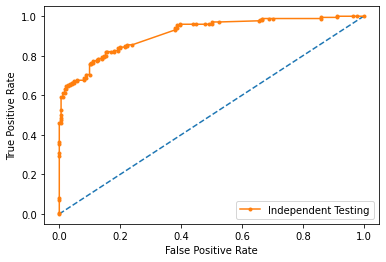

In [5]:
from sklearn.model_selection import train_test_split
print('\nIndependent testing')
# resultwriter.writerow(['\n\rindependent testing'])
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
# train dataset
print("training dataset 70%")
print(X_train.shape, y_train.shape)
# test dataset
print("testing dataset 30%")
print(X_test.shape, y_test.shape)
# train the model
std_scale = StandardScaler().fit(X_train)
X_train = np.array(X_train, dtype='float32')
X_train = std_scale.transform(X_train)
# X_train = std_scale.transform(X_train)
# X_train = np.array(X_train,dtype='float32')
X_train = X_train[:, ~np.isnan(X_train).any(axis=0)]
pca = PCA(n_components=2)
pca.fit(X_train)
X_train = pca.transform(X_train)
clf = RandomForestClassifier(n_estimators=25, max_depth=16, oob_score=True, n_jobs=-1, warm_start=True).fit(X_train, y_train.ravel())
#clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(9, 2), random_state=1).fit(X_train, y_train.ravel())
pred = np.round(clf.predict(X_train)) #clf
tn, fp, fn, tp = confusion_matrix(y_train, pred, labels=[1, 0]).ravel()
acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
sn=np.round(tp/(tp+fn))
sp=np.round(tn/(tn+fp))
prec=np.round(tp/(tp+fp))
mcc=np.round((tp*tn-fp*fn)/(math.sqrt((tp+fp)*(tp+fn)*(tn+fn)*(tn+fn))))
print("\nIndependent training data set confusion matrix")
print(
    (['True Negative =', tn, 'False Positive =', fp, 'False Negative =', fn, 'True Positive =', tp, 'Accuracy =', acc]))
print(
    (['Accuracy =', acc, 'Sensitivity =', sn, 'Precession =', prec, 'MCC =', mcc]))

# now test the model
std_scale = StandardScaler().fit(X_test)
X_test = std_scale.transform(X_test)
pca = PCA(n_components=2)
pca.fit(X_test)
X_test = pca.transform(X_test)
#clf = RandomForestClassifier(n_estimators=25, max_depth=12, oob_score=True, n_jobs=-1, warm_start=True).fit(X_test, y_test.ravel())
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(9, 2), random_state=1).fit(X_test, y_test.ravel())
pred_test = np.round(clf.predict(X_test)) # clf
tn1, fp1, fn1, tp1 = confusion_matrix(y_test, pred_test, labels=[1, 0]).ravel()
acc1 = np.round(((tn1 + tp1) / (tn1 + fp1 + fn1 + tp1)) * 100, 2)
sn1=np.round(tp1/(tp1+fn1))
sp1=np.round(tn/(tn1+fp1))
prec1=np.round(tp1/(tp1+fp1))
mcc1=np.round((tp1*tn1-fp1*fn1)/(math.sqrt((tp1+fp1)*(tp1+fn1)*(tn1+fn1)*(tn1+fn1))))
print("\nIndependent testing  data set confusion matrix")
print((['True Negative =', tn1, 'False Positive =', fp1, 'False Negative =', fn1, 'True Positive =', tp1, 'Accuracy =',
        acc1]))
print(
    (['Accuracy =', acc1, 'Sensitivity =', sn1, 'Specificity =', sp1, 'Precession =', prec1, 'MCC =', mcc1]))
with open('./result2.csv', 'w', newline='') as csvfile:
    resultwriter = csv.writer(csvfile, delimiter=',', quotechar='|')
    resultwriter.writerow(['Independent testing'])
    resultwriter.writerow(['training dataset 70%'])
    resultwriter.writerow([X_train.shape, y_train.shape])
    resultwriter.writerow(['testing dataset 30%'])
    resultwriter.writerow([X_test.shape, y_test.shape])
    resultwriter.writerow(["training data set confusion matrix"])
    resultwriter.writerow((
                          ['True Negative =', tn, 'False Positive =', fp, 'False Negative =', fn, 'True Positive =', tp,
                           'Accuracy =', acc]))
    resultwriter.writerow((['testing  data set confusion matrix']))
    resultwriter.writerow((['True Negative =', tn1, 'False Positive =', fp1, 'False Negative =', fn1, 'True Positive =',
                            tp1, 'Accuracy =', acc1]))

from matplotlib import pyplot

ns_probs1 = [0 for _ in range(len(y_test))]
lr_probs1 = clf.predict_proba(X_test) #clf
# keep probabilities for the positive outcome only
lr_probs1 = lr_probs1[:, 1]

# calculate roc curves
ns_fpr3, ns_tpr3, _ = roc_curve(y_test, ns_probs1)
lr_fpr3, lr_tpr3, _ = roc_curve(y_test, lr_probs1)

# plot the roc curve for the model
pyplot.plot(ns_fpr3, ns_tpr3, linestyle='--')
pyplot.plot(lr_fpr3, lr_tpr3, marker='.', label='Independent Testing')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()




# K fold Validation


10-fold Cross Validation

Fold : 1
[57, 1, 0, 57, 'Accuracy =', 99.13, 'Sensitivity =', 1.0, 'Precession =', 0.98, 'MCC =', 0.99]

Fold : 2
[56, 2, 0, 57, 'Accuracy =', 98.26, 'Sensitivity =', 1.0, 'Precession =', 0.97, 'MCC =', 0.98]

Fold : 3
[57, 0, 0, 58, 'Accuracy =', 100.0, 'Sensitivity =', 1.0, 'Precession =', 1.0, 'MCC =', 1.0]

Fold : 4
[56, 1, 0, 58, 'Accuracy =', 99.13, 'Sensitivity =', 1.0, 'Precession =', 0.98, 'MCC =', 0.99]

Fold : 5
[55, 2, 1, 56, 'Accuracy =', 97.37, 'Sensitivity =', 0.98, 'Precession =', 0.97, 'MCC =', 0.96]

Fold : 6
[56, 1, 1, 56, 'Accuracy =', 98.25, 'Sensitivity =', 0.98, 'Precession =', 0.98, 'MCC =', 0.96]

Fold : 7
[56, 1, 0, 57, 'Accuracy =', 99.12, 'Sensitivity =', 1.0, 'Precession =', 0.98, 'MCC =', 0.99]

Fold : 8
[56, 1, 0, 57, 'Accuracy =', 99.12, 'Sensitivity =', 1.0, 'Precession =', 0.98, 'MCC =', 0.99]

Fold : 9
[55, 2, 0, 57, 'Accuracy =', 98.25, 'Sensitivity =', 1.0, 'Precession =', 0.97, 'MCC =', 0.98]

Fold : 10
[57, 0, 1, 56, 'Ac

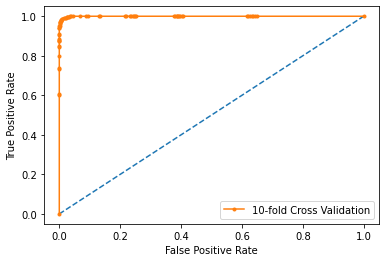

In [6]:
print('\n10-fold Cross Validation')
self_scores = []
tn, fp, fn, tp = confusion_matrix(y_train, pred, labels=[1, 0]).ravel()
self_scores.append([tn, fp, fn, tp, acc])
kfold = StratifiedKFold(n_splits=10, shuffle=True)
cvscores = []
iterator = 1
cv_score = 0
for train, test in kfold.split(X, Y):
    print('\nFold : ' + str(iterator))
    clf = RandomForestClassifier(n_estimators=25, max_depth=25, oob_score=True, n_jobs=-1, warm_start=True).fit(X, Y.ravel())
    #clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(9, 2), random_state=1).fit(X, Y.ravel())
    pred = np.round(clf.predict(X[test])) # clf
    tn, fp, fn, tp = confusion_matrix(Y[test], pred, labels=[1, 0]).ravel()
    acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
    sn=np.round((tp/(tp+fn)), 2)
    sp=np.round((tn/(tn+fp)), 2)
    prec=np.round((tp/(tp+fp)), 2)
    mcc=np.round(((tp*tn-fp*fn)/(math.sqrt((tp+fp)*(tp+fn)*(tn+fn)*(tn+fn)))), 2)
    cvscores.append([tn, fp, fn, tp, acc, sn, sp, prec, mcc])
    iterator = iterator + 1
    print([tn, fp, fn, tp, 'Accuracy =', acc, 'Sensitivity =', sn, 'Precession =', prec, 'MCC =', mcc])
    cv_score = cv_score + acc
print('\n\rFinal 10CV Score = ', np.round(cv_score / kfold.n_splits, 2))
with open('./result1.csv', 'w', newline='') as csvfile:
    resultwriter = csv.writer(csvfile, delimiter=',', quotechar='|')
    resultwriter.writerow(['Self-Consistency'])
    resultwriter.writerow(['True Negative', 'False Positive', 'False Negative', 'True Positive', 'Accuracy'])
    resultwriter.writerow(self_scores)
    resultwriter.writerow(['\n10-fold Cross Validation'])
    resultwriter.writerow(['True Negative', 'False Positive', 'False Negative', 'True Positive', 'Accuracy'])
    for i in range(cvscores.__len__()):
        resultwriter.writerow(cvscores[i])
    resultwriter.writerow(['The Final 10CV Score', '', '', '', np.round(cv_score / kfold.n_splits, 2)])

from matplotlib import pyplot

ns_probs1 = [0 for _ in range(len(Y))]
lr_probs1 = clf.predict_proba(X)# clf
# keep probabilities for the positive outcome only
lr_probs1 = lr_probs1[:, 1]
# calculate roc curves
ns_fpr2, ns_tpr2, _ = roc_curve(Y, ns_probs1)
lr_fpr2, lr_tpr2, _ = roc_curve(Y, lr_probs1)
# plot the roc curve for the model
pyplot.plot(ns_fpr2, ns_tpr2, linestyle='--')
pyplot.plot(lr_fpr2, lr_tpr2, marker='.', label='10-fold Cross Validation')
# axis labels

pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# Self Consistency



Self-Consistency
[561, 11, 4, 568, 98.69, 0.99, 'Accuracy =', 98.69, 'specificity=', 0.98, 'Sensitivity =', 0.99, 'Precession =', 0.98, 'MCC =', 0.98]


c:\python\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


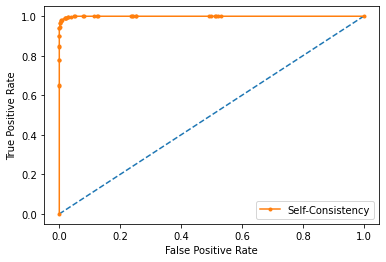

98.69

In [7]:
import matplotlib.pyplot as pyplot
print('\nSelf-Consistency')
clf = RandomForestClassifier(n_estimators=16, max_depth=40, oob_score=True, n_jobs=-1, warm_start=True).fit(X, Y.ravel())
#clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(9, 2), random_state=1).fit(X, Y.ravel())
pred = np.round(clf.predict(X)) # clf
tn, fp, fn, tp = confusion_matrix(Y, pred, labels=[1, 0]).ravel()
acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
sn=np.round((tp/(tp+fn)), 2)
sp=np.round((tn/(tn+fp)), 2)
prec=np.round((tp/(tp+fp)), 2)
mcc=np.round(((tp*tn-fp*fn)/(math.sqrt((tp+fp)*(tp+fn)*(tn+fn)*(tn+fn)))), 2)
print([tn, fp, fn, tp, acc, sn, 'Accuracy =', acc, 'specificity=', sp, 'Sensitivity =', sn, 'Precession =', prec, 'MCC =', mcc ])
ns_probs1 = [0 for _ in range(len(Y))]
lr_probs1 = clf.predict_proba(X) # clf
# keep probabilities for the positive outcome only
lr_probs1 = lr_probs1[:, 1]
ns_fpr1, ns_tpr1, _ = roc_curve(Y, ns_probs1)
lr_fpr1, lr_tpr1, _ = roc_curve(Y, lr_probs1)
# plot the roc curve for the model
pyplot.plot(ns_fpr1, ns_tpr1, linestyle='--')
pyplot.plot(lr_fpr1, lr_tpr1, marker='.', label='Self-Consistency')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
acc

# JackKnife


Jacknife testing

Jacknife : 1
[58, 0, 0, 0, 'Accuracy =', 100.0, 'Sensitivity =', nan, 'specificity=', 1.0, 'Precession =', nan, 'MCC =', nan]

Jacknife : 2
[58, 0, 0, 0, 'Accuracy =', 100.0, 'Sensitivity =', nan, 'specificity=', 1.0, 'Precession =', nan, 'MCC =', nan]

Jacknife : 3
[55, 3, 0, 0, 'Accuracy =', 94.83, 'Sensitivity =', nan, 'specificity=', 1.0, 'Precession =', 0.0, 'MCC =', nan]

Jacknife : 4
[58, 0, 0, 0, 'Accuracy =', 100.0, 'Sensitivity =', nan, 'specificity=', 1.0, 'Precession =', nan, 'MCC =', nan]

Jacknife : 5
[54, 3, 0, 0, 'Accuracy =', 94.74, 'Sensitivity =', nan, 'specificity=', 1.0, 'Precession =', 0.0, 'MCC =', nan]

Jacknife : 6
[57, 0, 0, 0, 'Accuracy =', 100.0, 'Sensitivity =', nan, 'specificity=', 1.0, 'Precession =', nan, 'MCC =', nan]

Jacknife : 7
[57, 0, 0, 0, 'Accuracy =', 100.0, 'Sensitivity =', nan, 'specificity=', 1.0, 'Precession =', nan, 'MCC =', nan]

Jacknife : 8
[18, 1, 0, 38, 'Accuracy =', 98.25, 'Sensitivity =', 1.0, 'specificity=', 1.0, 

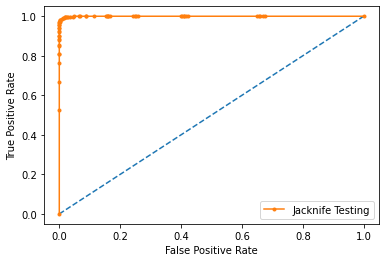

ValueError: Found input variables with inconsistent numbers of samples: [344, 1144]

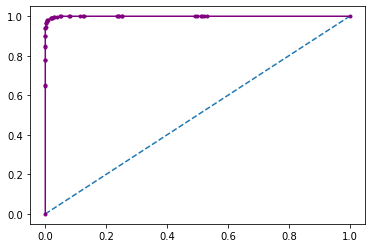

In [8]:
kfold = KFold(n_splits=20, shuffle=False)  # Removed Stratified Keyword for JackKnife
cvscores = []
iterator = 1
cv_score = 0

# Normalization
std_scale = StandardScaler().fit(X)
X = np.array(X, dtype='float64')
#X = std_scale.transform(X)
# pca = decomposition.PCA(n_components=2)
# pca.fit(X)
# X = pca.transform(X)
print('\nJacknife testing')
for train, test in kfold.split(X, Y):
    print('\nJacknife : ' + str(iterator))
    clf = RandomForestClassifier(n_estimators=30, max_depth=25, oob_score=True, n_jobs=-1, warm_start=False).fit(X, Y.ravel())
    #clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(9, 2), random_state=1).fit(X, Y.ravel())
    pred = np.round(clf.predict(X[test]))
    tn2, fp2, fn2, tp2 = confusion_matrix(Y[test], pred, labels=[1, 0]).ravel()
    acc2 = np.round(((tn2 + tp2)/ (tn2 + fp2 + fn2 + tp2)) * 100, 2)
    sn2=np.round(tp2/(tp2+fn2))
    sp2=np.round(tn2/(tn2+fp2))
    prec2=np.round(tp2/(tp2+fp2))
    mcc2=np.round((tp2*tn2-fp2*fn2)/(math.sqrt((tp2+fp2)*(tp2+fn2)*(tn2+fn2)*(tn2+fn2))))
    cvscores.append([tn2, fp2, fn2, tp2, acc2, sn2, sp2, prec2, mcc2])
    iterator = iterator + 1
    print([tn2, fp2, fn2, tp2, 'Accuracy =', acc2, 'Sensitivity =', sn2, 'specificity=', sp2, 'Precession =', prec2, 'MCC =', mcc2])
    cv_score = cv_score + acc2
print('\n\rFinal Jacknife Score = ', np.round(cv_score / kfold.n_splits, 2))
with open('./result3.csv', 'w', newline='') as csvfile:
    resultwriter = csv.writer(csvfile, delimiter=',', quotechar='|')
    resultwriter.writerow(['\nJacknife'])
    resultwriter.writerow(['True Negative' 'False Positive' 'False Negative' 'True Positive' 'Accuracy'])
    for i in range(cvscores.__len__()):
        resultwriter.writerow(cvscores[i])
    resultwriter.writerow(['The Final Jacknife Score', '', '', '', np.round(cv_score / kfold.n_splits, 2)])

from matplotlib import pyplot

ns_probs1 = [0 for _ in range(len(Y))]
lr_probs1 = clf.predict_proba(X)#clf
# keep probabilities for the positive outcome only
lr_probs1 = lr_probs1[:, 1]

# calculate roc curves
ns_fpr4, ns_tpr4, _ = roc_curve(Y, ns_probs1)
lr_fpr4, lr_tpr4, _ = roc_curve(Y, lr_probs1)

# plot the roc curve for the model
pyplot.plot(ns_fpr4, ns_tpr4, linestyle='--')
pyplot.plot(lr_fpr4, lr_tpr4, marker='.', label='Jacknife Testing')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# plot the roc curve for the model
pyplot.plot(ns_fpr1, ns_tpr1, linestyle='--', )
pyplot.plot(lr_fpr1, lr_tpr1, marker='.', color='purple', label='Self-Consistency')

# plot the roc curve for the model
ns_fpr2, ns_tpr2, _ = roc_curve(y_test, ns_probs1) # this is needed to be check as I suppose to be true but needed verification
pyplot.plot(ns_fpr2, ns_tpr2, linestyle='--', color='Blue')
pyplot.plot(lr_fpr2, lr_tpr2, linestyle='-', color='Green', label='10-fold Cross Validation')

# plot the roc curve for the model
pyplot.plot(ns_fpr3, ns_tpr3, linestyle='--')
pyplot.plot(lr_fpr3, lr_tpr3, marker='.', color='Cyan', label='Independent Testing')

# plot the roc curve for the model
pyplot.plot(ns_fpr4, ns_tpr4, linestyle='--')
pyplot.plot(lr_fpr4, lr_tpr4, marker='.', color='yellow', label='Jacknife Testing')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()